In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as miss

# Cleaning Session data

In [9]:
session=pd.read_csv('sessions.csv')
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


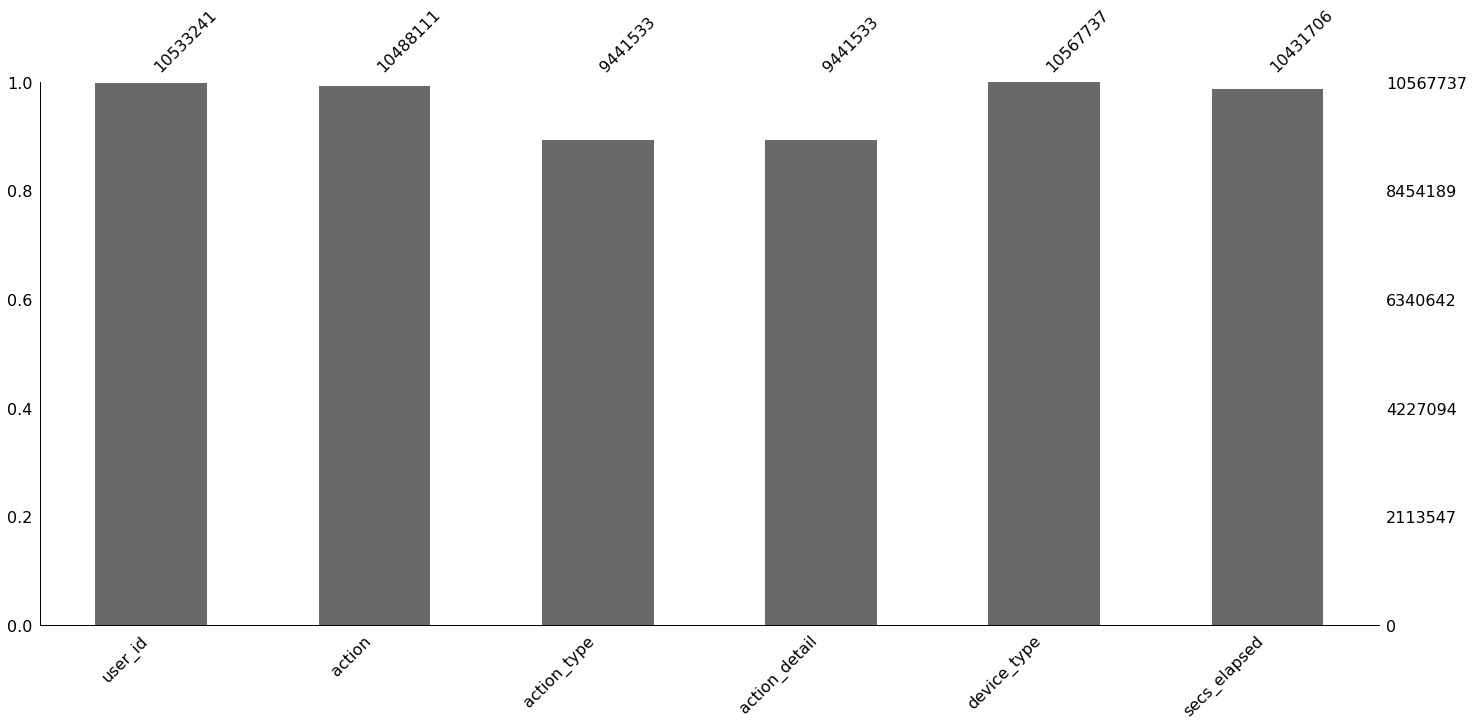

In [5]:
import missingno as miss
miss.bar(session)
sns.despine()

In [10]:
#Handing the NaN values repaceing with mode of column
session['action'].fillna(session['action'].mode()[0], inplace=True)
session['action_type'].fillna(session['action_type'].mode()[0], inplace=True)
session['action_detail'].fillna(session['action_detail'].mode()[0], inplace=True)
session['device_type'].fillna(session['device_type'].mode()[0], inplace=True)
session['secs_elapsed'].fillna(0, inplace=True)

#replacing space with _ in device_type
session.device_type = session.device_type.str.replace(' ',"_")

In [11]:
print(session.shape)
session.head()

(10567737, 6)


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,view,view_search_results,Windows_Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows_Desktop,67753.0
2,d1mm9tcy42,lookup,view,view_search_results,Windows_Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows_Desktop,22141.0
4,d1mm9tcy42,lookup,view,view_search_results,Windows_Desktop,435.0


In [12]:
#Removing null values form user_id
session = session[pd.isnull(session.user_id) == False]

In [13]:
session.shape

(10533241, 6)

In [14]:
#adding spaces to variale to merge in one row 
session['action']   = [" "+i+" " for i in session['action']]
session['action_type']   = [" "+i+" " for i in session['action_type']]
session['action_detail']   = [" "+i+" " for i in session['action_detail']]

In [15]:
user_id=list(set(session['user_id'].values))
len(user_id)

135483

In [16]:
#Taking mean value of particular user
sec_e= session.groupby('user_id', sort = False)[['secs_elapsed']].mean()

In [17]:
#Generating new_session with one row for one user_id
action = session.groupby('user_id', sort = False)[['action']].sum()
action_type = session.groupby('user_id', sort = False)[['action_type']].sum()
action_detail = session.groupby('user_id', sort = False)[['action_detail']].sum()


In [18]:
#Create new data frame as new_session after using groupby on session data

new_session=pd.DataFrame(user_id,columns=['user_id'])
new_session['action']=action['action'].values
new_session['action_type']=action_type['action_type'].values
new_session['action_detail']=action_detail['action_detail'].values
new_session['secs_elapsed']=sec_e['secs_elapsed'].values
new_session.head()

,user_id,action,action_type,action_detail,secs_elapsed
0,sewl87gi2x,lookup search_results lookup search_result...,view click view click view click view ...,view_search_results view_search_results vie...,26988.417323
1,vd1rs5w6ue,dashboard create confirm_email show show_...,view submit click view data view data ...,dashboard create_user confirm_email_link p...,23093.555556
2,iyaa86otid,verify create show pending requested hea...,-unknown- submit message_post booking_requ...,-unknown- create_user message_post pending...,70965.250000
3,5h21161qfo,lookup show search_results search_results ...,view view click click view view click ...,view_search_results p3 view_search_results ...,24704.605263
4,97xkypgyjg,campaigns active create notifications lis...,-unknown- -unknown- -unknown- -unknown- -...,-unknown- -unknown- -unknown- -unknown- -...,319.375000


In [19]:
new_session.shape

(135483, 5)

# Cleaning train data

In [42]:
train=pd.read_csv('train_users_2.csv')
print(train.shape)
train.head()

(213451, 16)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [43]:
# Splitting date time data for date account created and date_first_booking

train['account_created_day'] = pd.DatetimeIndex(train['date_account_created']).day
train['account_created_month'] = pd.DatetimeIndex(train['date_account_created']).month
train['first_booking_day'] = pd.DatetimeIndex(train['date_first_booking']).day
train['first_booking_month'] = pd.DatetimeIndex(train['date_first_booking']).month
train.head(2)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_created_day,account_created_month,first_booking_day,first_booking_month
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,28,6,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,25,5,NaN,NaN


In [44]:
train.rename(columns={"id": "user_id"},inplace='True')
train.head(2)

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_created_day,account_created_month,first_booking_day,first_booking_month
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,28,6,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,25,5,NaN,NaN


In [45]:
train.shape

(213451, 20)

In [46]:
#cleaning the train data variables
train['first_device_type'] = [ s.replace(' ', "_") for s in train.first_device_type]
train['affiliate_channel'] = [ s.replace('-', "_") for s in train.affiliate_channel]
train['affiliate_provider'] = [ s.replace('-', "_") for s in train.affiliate_provider]
train['first_device_type'] = [ s.replace('/', "_") for s in train.first_device_type]
train['first_device_type'] = [ s.replace('(', "") for s in train.first_device_type]
train['first_device_type'] = [ s.replace(')', "") for s in train.first_device_type]
train['first_browser'] = [ s.replace('-', "") for s in train.first_browser]
train['first_browser'] = [ s.replace(' ', "_") for s in train.first_browser]
train['first_browser'] = [ s.replace('.', "_") for s in train.first_browser]
train['gender'] = [ s.replace('-', "") for s in train.gender]
train.head()

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_created_day,account_created_month,first_booking_day,first_booking_month
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,unknown,NaN,facebook,0,en,direct,direct,untracked,Web,Mac_Desktop,Chrome,NDF,28,6,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac_Desktop,Chrome,NDF,25,5,NaN,NaN
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows_Desktop,IE,US,28,9,2.0,8.0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac_Desktop,Firefox,other,5,12,8.0,9.0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,unknown,41.0,basic,0,en,direct,direct,untracked,Web,Mac_Desktop,Chrome,US,14,9,18.0,2.0


In [47]:
# dropping columns 
train=train.drop(['date_account_created', 'timestamp_first_active','date_first_booking','first_affiliate_tracked'], axis=1)
train.head()

,user_id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination,account_created_day,account_created_month,first_booking_day,first_booking_month
0,gxn3p5htnn,unknown,NaN,facebook,0,en,direct,direct,Web,Mac_Desktop,Chrome,NDF,28,6,NaN,NaN
1,820tgsjxq7,MALE,38.0,facebook,0,en,seo,google,Web,Mac_Desktop,Chrome,NDF,25,5,NaN,NaN
2,4ft3gnwmtx,FEMALE,56.0,basic,3,en,direct,direct,Web,Windows_Desktop,IE,US,28,9,2.0,8.0
3,bjjt8pjhuk,FEMALE,42.0,facebook,0,en,direct,direct,Web,Mac_Desktop,Firefox,other,5,12,8.0,9.0
4,87mebub9p4,unknown,41.0,basic,0,en,direct,direct,Web,Mac_Desktop,Chrome,US,14,9,18.0,2.0


In [48]:
train.shape

(213451, 16)

In [49]:
#performing inner join on train and new_session data to form our final data which we use for feature engineering and modeling

new_train=train.set_index('user_id').join(new_session.set_index('user_id'),how='inner',on='user_id').reset_index()
new_train.head()

,user_id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination,account_created_day,account_created_month,first_booking_day,first_booking_month,action,action_type,action_detail,secs_elapsed
0,d1mm9tcy42,MALE,62.0,basic,0,en,sem_non_brand,google,Web,Windows_Desktop,Chrome,other,1,1,4.0,1.0,show show social_connections show reviews...,view view data view data view view dat...,user_profile user_profile user_social_conne...,9304.728972
1,yo8nz8bqcq,unknown,NaN,basic,0,en,direct,direct,Web,Mac_Desktop,Firefox,NDF,1,1,NaN,NaN,create search reviews show social_connect...,submit click data view data view click ...,create_user view_search_results listing_rev...,24191.942529
2,4grx6yxeby,unknown,NaN,basic,0,en,sem_brand,google,Web,Windows_Desktop,Firefox,NDF,1,1,NaN,NaN,update manage_listing manage_listing index...,submit view view view data view click ...,update_listing manage_listing manage_listin...,33019.116279
3,ncf87guaf0,unknown,NaN,basic,0,en,direct,direct,Web,Windows_Desktop,Chrome,NDF,1,1,NaN,NaN,show show social_connections active revie...,view view data -unknown- data view data...,p3 user_profile user_social_connections -u...,7480.190476
4,4rvqpxoh3h,unknown,NaN,basic,25,en,direct,direct,iOS,iPhone,unknown,GB,1,1,2.0,1.0,index show similar_listings_v2 ajax_refres...,view view view click view data view vi...,view_search_results p3 view_search_results ...,52411.625000


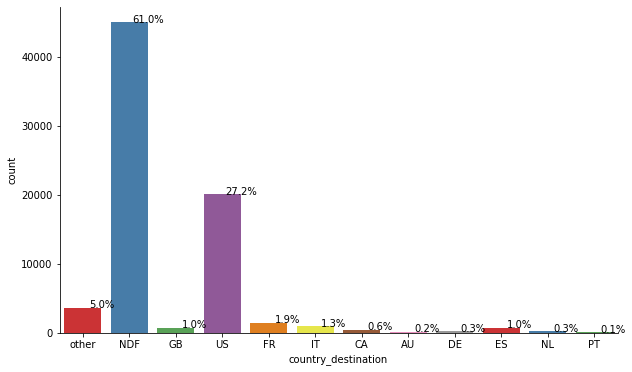

In [50]:
# Bar plot on country_destination after performing join of two data frames

plt.figure(figsize=(10,6))
ax = sns.countplot(x="country_destination", data=new_train,palette='Set1')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/new_train.shape[0])
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
sns.despine()

In [51]:
#cleaning the age field in new_data

new_train.loc[new_train['age'] > 95, 'age'] = np.nan
new_train.loc[new_train['age'] < 16, 'age'] = np.nan
new_train.loc[new_train['age'].isnull(), 'age' ] = new_train['age'].median()

In [52]:
new_train['first_booking_day'].isnull().values.any()

True

In [53]:
# handling null values in first_booking_day and first_booking_month

new_train['first_booking_day'].fillna(0, inplace=True)
new_train['first_booking_month'].fillna(0,inplace=True)

In [54]:
new_train.head()

,user_id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination,account_created_day,account_created_month,first_booking_day,first_booking_month,action,action_type,action_detail,secs_elapsed
0,d1mm9tcy42,MALE,62.0,basic,0,en,sem_non_brand,google,Web,Windows_Desktop,Chrome,other,1,1,4.0,1.0,show show social_connections show reviews...,view view data view data view view dat...,user_profile user_profile user_social_conne...,9304.728972
1,yo8nz8bqcq,unknown,32.0,basic,0,en,direct,direct,Web,Mac_Desktop,Firefox,NDF,1,1,0.0,0.0,create search reviews show social_connect...,submit click data view data view click ...,create_user view_search_results listing_rev...,24191.942529
2,4grx6yxeby,unknown,32.0,basic,0,en,sem_brand,google,Web,Windows_Desktop,Firefox,NDF,1,1,0.0,0.0,update manage_listing manage_listing index...,submit view view view data view click ...,update_listing manage_listing manage_listin...,33019.116279
3,ncf87guaf0,unknown,32.0,basic,0,en,direct,direct,Web,Windows_Desktop,Chrome,NDF,1,1,0.0,0.0,show show social_connections active revie...,view view data -unknown- data view data...,p3 user_profile user_social_connections -u...,7480.190476
4,4rvqpxoh3h,unknown,32.0,basic,25,en,direct,direct,iOS,iPhone,unknown,GB,1,1,2.0,1.0,index show similar_listings_v2 ajax_refres...,view view view click view data view vi...,view_search_results p3 view_search_results ...,52411.625000


In [55]:
new_train.shape

(73815, 20)

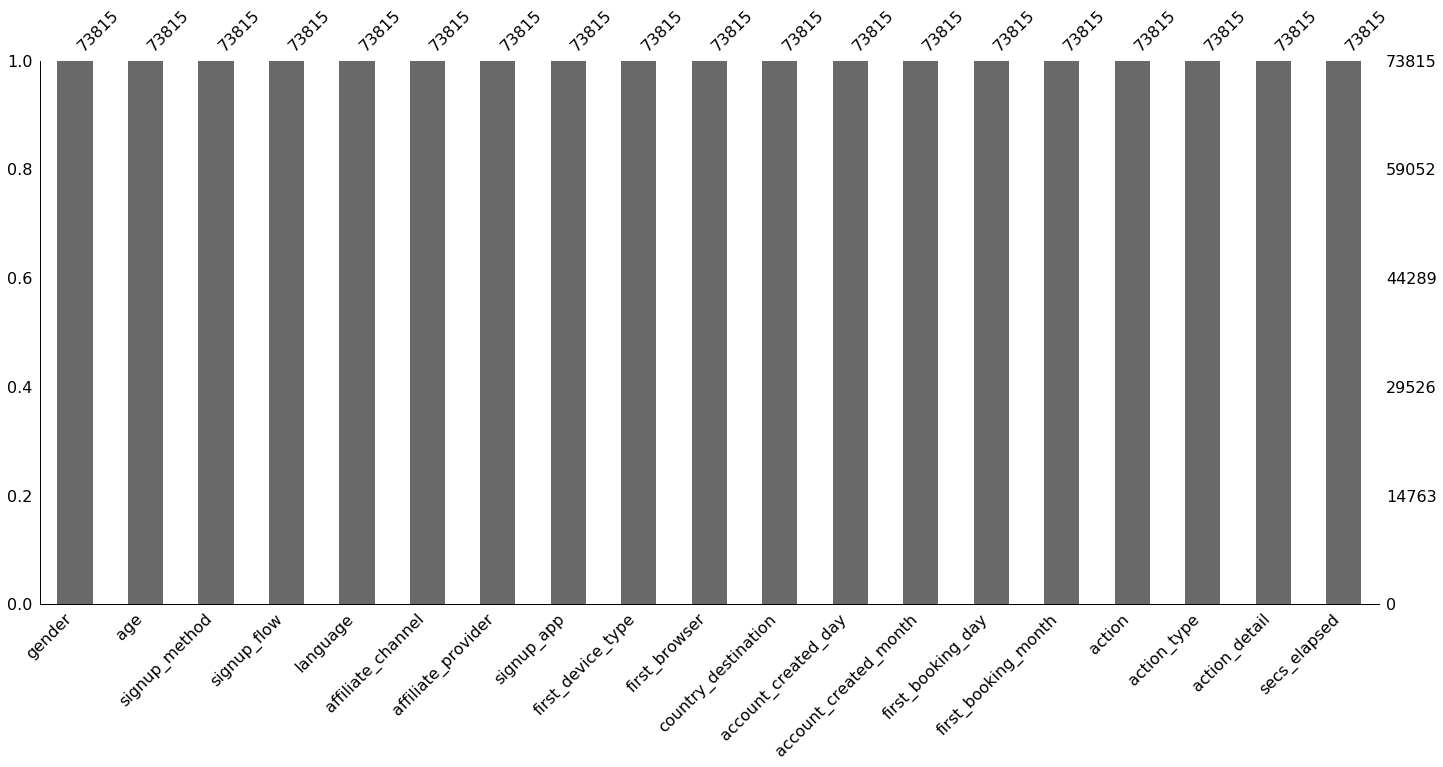

In [98]:
import missingno as miss
miss.bar(new_train)
sns.despine()

As we can see there are no null values are remaining so we can proceed for feature engineering

In [56]:
new_train.to_csv('final_train.csv',  index=False)

# Cleaning test data

In [57]:
data=pd.read_csv('test_users.csv')
data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [58]:
data.shape

(62096, 15)

In [59]:
# Splitting date time data for date account created and date_first_booking

data['account_created_day'] = pd.DatetimeIndex(data['date_account_created']).day
data['account_created_month'] = pd.DatetimeIndex(data['date_account_created']).month
data['first_booking_day'] = pd.DatetimeIndex(data['date_first_booking']).day
data['first_booking_month'] = pd.DatetimeIndex(data['date_first_booking']).month
data.head(2)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,account_created_day,account_created_month,first_booking_day,first_booking_month
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,1,7,NaN,NaN
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,1,7,NaN,NaN


In [60]:
data.rename(columns={"id": "user_id"},inplace='True')
data.head(2)

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,account_created_day,account_created_month,first_booking_day,first_booking_month
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,1,7,NaN,NaN
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,1,7,NaN,NaN


In [61]:
data['first_device_type'] = [ s.replace(' ', "_") for s in data.first_device_type]
data['affiliate_channel'] = [ s.replace('-', "_") for s in data.affiliate_channel]
data['affiliate_provider'] = [ s.replace('-', "_") for s in data.affiliate_provider]
data['first_device_type'] = [ s.replace('/', "_") for s in data.first_device_type]
data['first_device_type'] = [ s.replace('(', "") for s in data.first_device_type]
data['first_device_type'] = [ s.replace(')', "") for s in data.first_device_type]
data['first_browser'] = [ s.replace('-', "") for s in data.first_browser]
data['first_browser'] = [ s.replace(' ', "_") for s in data.first_browser]
data['first_browser'] = [ s.replace('.', "_") for s in data.first_browser]
data['gender'] = [ s.replace('-', "") for s in data.gender]
data.head()

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,account_created_day,account_created_month,first_booking_day,first_booking_month
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile_Safari,1,7,NaN,NaN
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,unknown,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile_Safari,1,7,NaN,NaN
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,unknown,NaN,basic,0,en,direct,direct,linked,Web,Windows_Desktop,Chrome,1,7,NaN,NaN
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,unknown,NaN,basic,0,en,direct,direct,linked,Web,Windows_Desktop,IE,1,7,NaN,NaN
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,unknown,NaN,basic,0,en,direct,direct,untracked,Web,Mac_Desktop,Safari,1,7,NaN,NaN


In [62]:
# dropping columns 
data=data.drop(['date_account_created', 'timestamp_first_active','date_first_booking','first_affiliate_tracked'], axis=1)
data.head()

,user_id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,account_created_day,account_created_month,first_booking_day,first_booking_month
0,5uwns89zht,FEMALE,35.0,facebook,0,en,direct,direct,Moweb,iPhone,Mobile_Safari,1,7,NaN,NaN
1,jtl0dijy2j,unknown,NaN,basic,0,en,direct,direct,Moweb,iPhone,Mobile_Safari,1,7,NaN,NaN
2,xx0ulgorjt,unknown,NaN,basic,0,en,direct,direct,Web,Windows_Desktop,Chrome,1,7,NaN,NaN
3,6c6puo6ix0,unknown,NaN,basic,0,en,direct,direct,Web,Windows_Desktop,IE,1,7,NaN,NaN
4,czqhjk3yfe,unknown,NaN,basic,0,en,direct,direct,Web,Mac_Desktop,Safari,1,7,NaN,NaN


In [63]:
#performing inner join on train and new_session data to form our final data which we use for feature engineering and modeling

test=data.set_index('user_id').join(new_session.set_index('user_id'),how='inner',on='user_id').reset_index()
test.head()

,user_id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,account_created_day,account_created_month,first_booking_day,first_booking_month,action,action_type,action_detail,secs_elapsed
0,5uwns89zht,FEMALE,35.0,facebook,0,en,direct,direct,Moweb,iPhone,Mobile_Safari,1,7,NaN,NaN,edit_verification references active update...,view view -unknown- submit submit submit...,profile_verifications profile_references -u...,32681.421053
1,jtl0dijy2j,unknown,NaN,basic,0,en,direct,direct,Moweb,iPhone,Mobile_Safari,1,7,NaN,NaN,personalize show message_to_host_focus mes...,data view click click -unknown- view vi...,wishlist_content_update p3 message_to_host_...,9554.074074
2,xx0ulgorjt,unknown,NaN,basic,0,en,direct,direct,Web,Windows_Desktop,Chrome,1,7,NaN,NaN,show social_connections show index show ...,view data -unknown- view -unknown- -unkn...,user_profile user_social_connections -unkno...,12815.333333
3,6c6puo6ix0,unknown,NaN,basic,0,en,direct,direct,Web,Windows_Desktop,IE,1,7,NaN,NaN,requested requested requested new request...,view view view view submit view view s...,p5 p5 p5 list_your_space post_checkout_ac...,25665.875000
4,czqhjk3yfe,unknown,NaN,basic,0,en,direct,direct,Web,Mac_Desktop,Safari,1,7,NaN,NaN,ajax_check_dates show similar_listings_v2 ...,click view view click data view -unknow...,change_contact_host_dates p3 view_search_re...,18401.403900


In [64]:
test.shape

(61668, 19)

In [65]:
test.columns

Index(['user_id', 'gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'signup_app',
       'first_device_type', 'first_browser', 'account_created_day',
       'account_created_month', 'first_booking_day', 'first_booking_month',
       'action', 'action_type', 'action_detail', 'secs_elapsed'],
      dtype='object')

In [66]:
#cleaning the age field in new_data

test.loc[test['age'] > 95, 'age'] = np.nan
test.loc[test['age'] < 16, 'age'] = np.nan
test.loc[test['age'].isnull(), 'age' ] = new_train['age'].median()

In [67]:
# handling null values in first_booking_day and first_booking_month

test['first_booking_day'].fillna(0, inplace=True)
test['first_booking_month'].fillna(0,inplace=True)

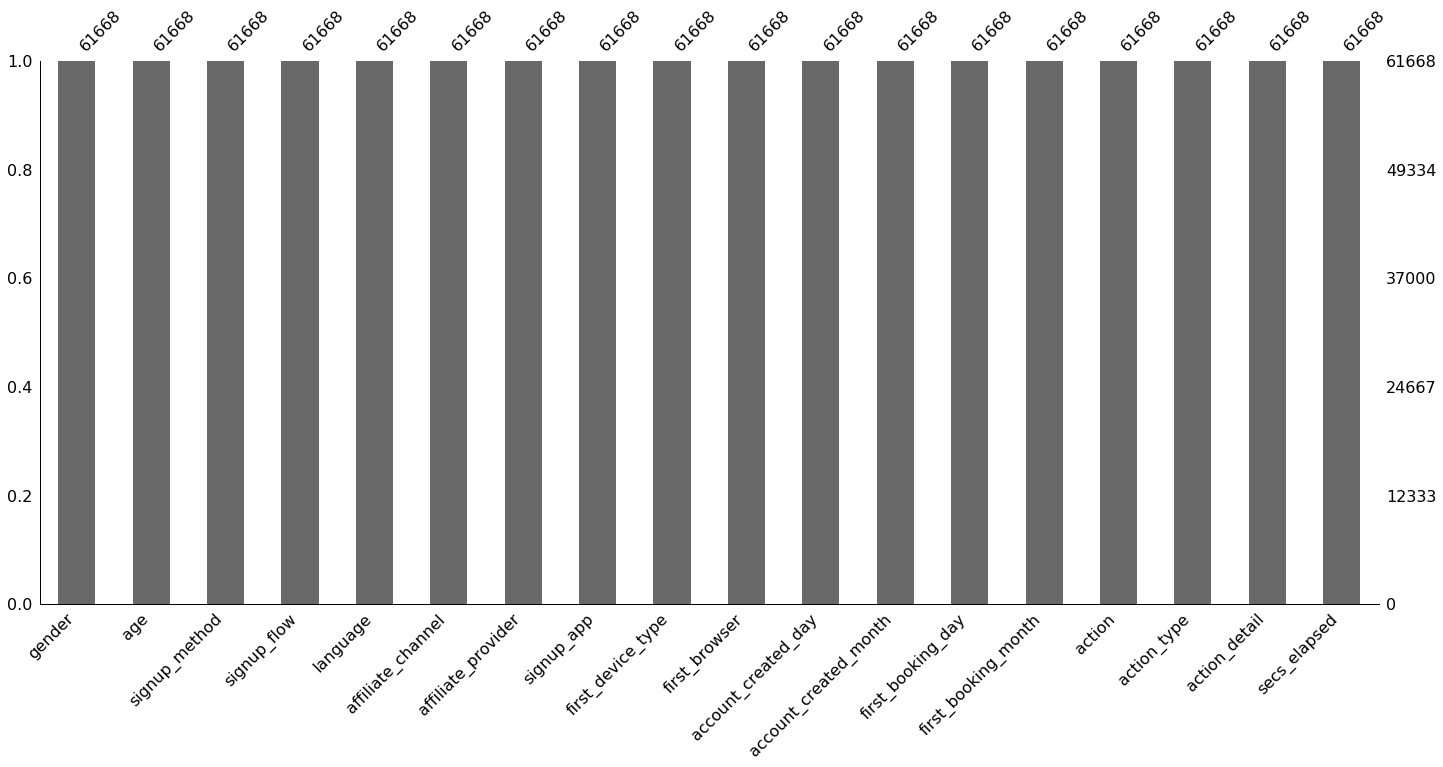

In [26]:
import missingno as miss
miss.bar(test)
sns.despine()

In [68]:
test.head(10)

,user_id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,account_created_day,account_created_month,first_booking_day,first_booking_month,action,action_type,action_detail,secs_elapsed
0,5uwns89zht,FEMALE,35.0,facebook,0,en,direct,direct,Moweb,iPhone,Mobile_Safari,1,7,0.0,0.0,edit_verification references active update...,view view -unknown- submit submit submit...,profile_verifications profile_references -u...,32681.421053
1,jtl0dijy2j,unknown,32.0,basic,0,en,direct,direct,Moweb,iPhone,Mobile_Safari,1,7,0.0,0.0,personalize show message_to_host_focus mes...,data view click click -unknown- view vi...,wishlist_content_update p3 message_to_host_...,9554.074074
2,xx0ulgorjt,unknown,32.0,basic,0,en,direct,direct,Web,Windows_Desktop,Chrome,1,7,0.0,0.0,show social_connections show index show ...,view data -unknown- view -unknown- -unkn...,user_profile user_social_connections -unkno...,12815.333333
3,6c6puo6ix0,unknown,32.0,basic,0,en,direct,direct,Web,Windows_Desktop,IE,1,7,0.0,0.0,requested requested requested new request...,view view view view submit view view s...,p5 p5 p5 list_your_space post_checkout_ac...,25665.875000
4,czqhjk3yfe,unknown,32.0,basic,0,en,direct,direct,Web,Mac_Desktop,Safari,1,7,0.0,0.0,ajax_check_dates show similar_listings_v2 ...,click view view click data view -unknow...,change_contact_host_dates p3 view_search_re...,18401.403900
5,szx28ujmhf,FEMALE,28.0,basic,0,en,sem_brand,google,Web,Windows_Desktop,Chrome,1,7,0.0,0.0,recommendations recommendations recommendat...,data data data data view data data dat...,listing_recommendations listing_recommendati...,12883.226891
6,guenkfjcbq,MALE,48.0,basic,25,en,direct,direct,iOS,iPhone,unknown,1,7,0.0,0.0,search_results personalize show ajax_refre...,click data view click view view view d...,view_search_results wishlist_content_update ...,10027.369231
7,tkpq0mlugk,unknown,32.0,basic,0,en,direct,direct,Web,Mac_Desktop,Chrome,1,7,0.0,0.0,personalize other_hosting_reviews_first aja...,data -unknown- click data view data vie...,wishlist_content_update -unknown- change_tr...,11556.212500
8,3xtgd5p9dn,unknown,32.0,basic,0,en,direct,direct,Web,Mac_Desktop,Chrome,1,7,0.0,0.0,populate_help_dropdown index my index ind...,-unknown- view view view view view view...,-unknown- user_wishlists user_wishlists yo...,43263.447368
9,md9aj22l5a,unknown,32.0,basic,0,en,sem_non_brand,google,Web,Windows_Desktop,Firefox,1,7,0.0,0.0,update show update collections active co...,submit -unknown- submit view -unknown- v...,update_user -unknown- update_listing user_...,45452.156250


In [69]:
test.to_csv('final_test.csv',  index=False)

In [1]:
print("hello")

print("coool")

hello
